# Test fitting using zfit

In [2]:
import numpy as np
import zfit
import matplotlib.pyplot as plt
import tensorflow as tf
import zfit.z.numpy as znp

d:\programmi\anaconda3\envs\std\Lib\site-packages\zfit\__init__.py:60: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


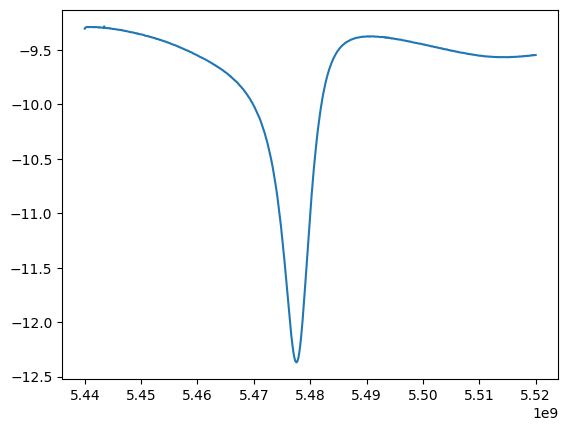

In [3]:
# Read data 
path = '../Data/fit_test/Resonances/20mK_-5dBm.txt'
raw_data = np.loadtxt(path, delimiter=' ', skiprows=0)

plt.plot(raw_data[:,0], raw_data[:,1])

In [ ]:
def S21_func_old(data, a, b, f_r, Q_l, Q_c, phi_0):
    f = data.unstack_x()
    omega = 2 * znp.pi * f
    omega_r = 2 * znp.pi * f_r
    term1 = a*f + b*(f**2) 
    term2 = Q_l/znp.abs(Q_c) * znp.exp(1j * phi_0)
    term3 = 1 + 2j * Q_l * (f/f_r - 1)
    S21 = term1 * (term2/term3)
    return S21

In [32]:
def S21_func(data, a, b, f_r, Q_l, Q_c, phi_0):
    f = data.unstack_x()
    omega = 2 * znp.pi * f
    omega_r = 2 * znp.pi * f_r
    term1 = a*f + b*(f**2) 
    term2_coeff = Q_l/znp.abs(Q_c)
    term2_exp = znp.exp(1j * phi_0)
    term2 = Q_l/znp.abs(Q_c) * znp.exp(1j * phi_0)
    term3 = 1 + 2j * Q_l * (f/f_r - 1)
    S21 = term1 * (term2/term3)
    return S21

In [34]:
def dummy_func(data, a, b, f_r, Q_l, Q_c, phi_0):
    f = data.unstack_x()
    result = a + b*f + f_r*f**2 + Q_l*f**3 + Q_c*f**4 + phi_0*f**5
    return result

In [82]:
# Fit with zfit
X = raw_data[:,0]
Y = raw_data[:,1]
obs = zfit.Space('x', limits=(np.min(X), np.max(X)))

# Data
data = zfit.Data.from_numpy(obs=obs, array=X)

# Parameters
a = zfit.Parameter('a', -10)  # adjusted to be near the baseline of the graph
b = zfit.Parameter('b', 1)    # small value, sign depending on the slope at the middle
f_r = zfit.Parameter('f_r', -1000)  # significant negative value for a sharp dip
Q_l = zfit.Parameter('Q_l', 100)    # positive value, but can adjust based on skewness
Q_c = zfit.Parameter('Q_c', -100)   # negative value to fit curvature
phi_0 = zfit.Parameter('phi_0', 1)  # smaller influence, adjust as needed

# Loss
def mse(params):
    a, b, f_r, Q_l, Q_c, phi_0 = params
    prediction = dummy_func(data, a, b, f_r, Q_l, Q_c, phi_0)
    value = znp.mean((Y - prediction)**2)
    return value

loss = zfit.loss.SimpleLoss(mse, [a, b, f_r, Q_l, Q_c, phi_0], errordef=1)

# Minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(loss)


KeyboardInterrupt: 

In [73]:
import zfit
import zfit.z.numpy as znp
import tensorflow as tf


param1 = zfit.Parameter('param1', 5, 1, 10)
# we can build a model here if we want, but in principle, it's not necessary

x = znp.random.uniform(size=(100,))
y = x * tf.random.normal(mean=4, stddev=0.1, shape=x.shape, dtype=znp.float64)


def squared_loss(params):
    param1 = params[0]
    y_pred = x*param1
    # zfit PDF or Func inside
    squared = (y_pred - y)**2
    mse = znp.mean(squared)
    return mse


params = [param1]
loss = zfit.loss.SimpleLoss(squared_loss, params, errordef=1)

minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(loss)


In [74]:
params_array = [p.value().numpy() for p in params]
print(params_array)

[4.010846038876478]


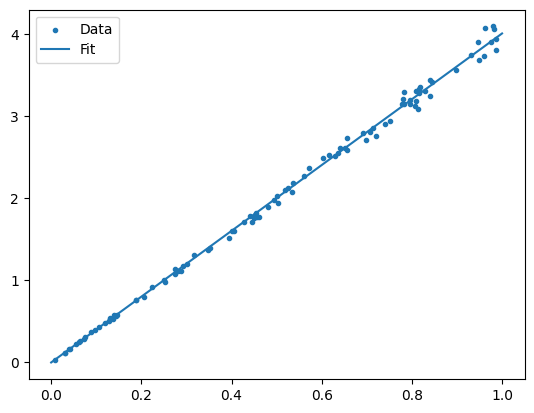

In [76]:
# Plot the result
plt.scatter(x,y, marker='.', label='Data')
linspace = np.linspace(0, 1, 100)
plt.plot(linspace, params_array[0] * linspace, label='Fit')
plt.legend()
plt.show()